# Classification_Bank_Marketing
#### 2024.10.01
#### Chulwon Chae

### Purpose of Analysis
    - Analyze bank customer data to determine whether to proceed with marketing efforts.
    - The goal is to optimize the bank's marketing expenses and achieve cost savings through analysis

In [1]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 32.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.1
    Uninstalling matplotlib-3.9.1:
      Successfully uninstalled matplotlib-3.9.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [4]:
# library for feature engineering and EDA
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from datetime import datetime
import random

# library for statistic
from scipy import stats
from scipy.stats import chi2_contingency, kruskal
from scipy.stats import boxcox, norm
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

# library for sampling 
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

# library for machine learning
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import shap
%matplotlib inline

## 1. Data Processing 1 

### 1-1 Data Load 

In [5]:
random_state = 1234

In [7]:
df = pd.read_csv('./data/07.bank_marketing/bank-additional-full.csv', delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 1-2 Duplicated Data

In [8]:
print("Duplicated : ",len(df[df.duplicated()]))

Duplicated :  12


In [10]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [11]:
df[df.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [12]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [14]:
df = df.reset_index(drop=True)

In [15]:
print("Duplicated : ",len(df[df.duplicated()]))

Duplicated :  0


## 2. Data EDA

### 2-1 Data Type and Summary

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [17]:
# categorical and numeric columns 
for column_name in list(df.columns):
    print(column_name, df[column_name].dtype, df[column_name].unique())

age int64 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job object ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital object ['married' 'single' 'divorced' 'unknown']
education object ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default object ['no' 'unknown' 'yes']
housing object ['no' 'yes' 'unknown']
loan object ['no' 'yes' 'unknown']
contact object ['telephone' 'cellular']
month object ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week object ['mon' 'tue' 'wed' 'thu' 'fri']
duration int64 [ 261  149  226 ... 1246 1556 1868]
campaign int64 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 

In [18]:
list_categorical_columns = list(df.select_dtypes(include=['object']).columns)
list_numeric_columns = list(df.select_dtypes(include=['float64','int64']).columns)
target_column = "y"

print(len(df))
print(len(df.columns))
print(len(list_categorical_columns))
print(len(list_numeric_columns))

41176
21
11
10


In [19]:
# Null Value
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### Summary of Data Set
##### - Number of Variables : 21
    categorical variables : 11 (target incl.)
    numeric variables : 10 
##### - Number of observations : 41176 (12 duplicated row dropped)
##### - Missing Cells : 0 columns
##### - Duplicated Rows : 12

### 2-2 Dependent Data Explore

In [20]:
list_categorical_columns.remove(target_column)

In [21]:
df[target_column].describe()

count     41176
unique        2
top          no
freq      36537
Name: y, dtype: object

In [22]:
df[target_column].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

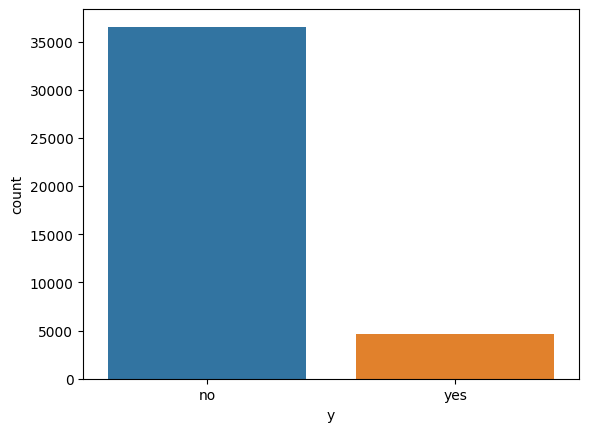

In [23]:
sns.countplot(x=target_column, data=df)

#### Insight : Imbalance Data.

- There is a difference in the portion of the two target classes.
- the problem can be solved using sampling and cost-sensitive learning.
- If the data with the "Yes" attribute has meaningful data distribution and characteristics, the model can perform well without additional sampling.
- (Important) When independent variables include categorical data, one-hot encoding should be performed before sampling (oversampling or undersampling).

### 2-3 Independent Data Explore

#### 1) Categorical Data Analysis

##### Check any useless column (if it has only one unique value (for categorical columns))

In [25]:
df[list_categorical_columns].nunique().sort_values() 

contact         2
default         3
housing         3
loan            3
poutcome        3
marital         4
day_of_week     5
education       8
month          10
job            12
dtype: int64

##### Column Distribution

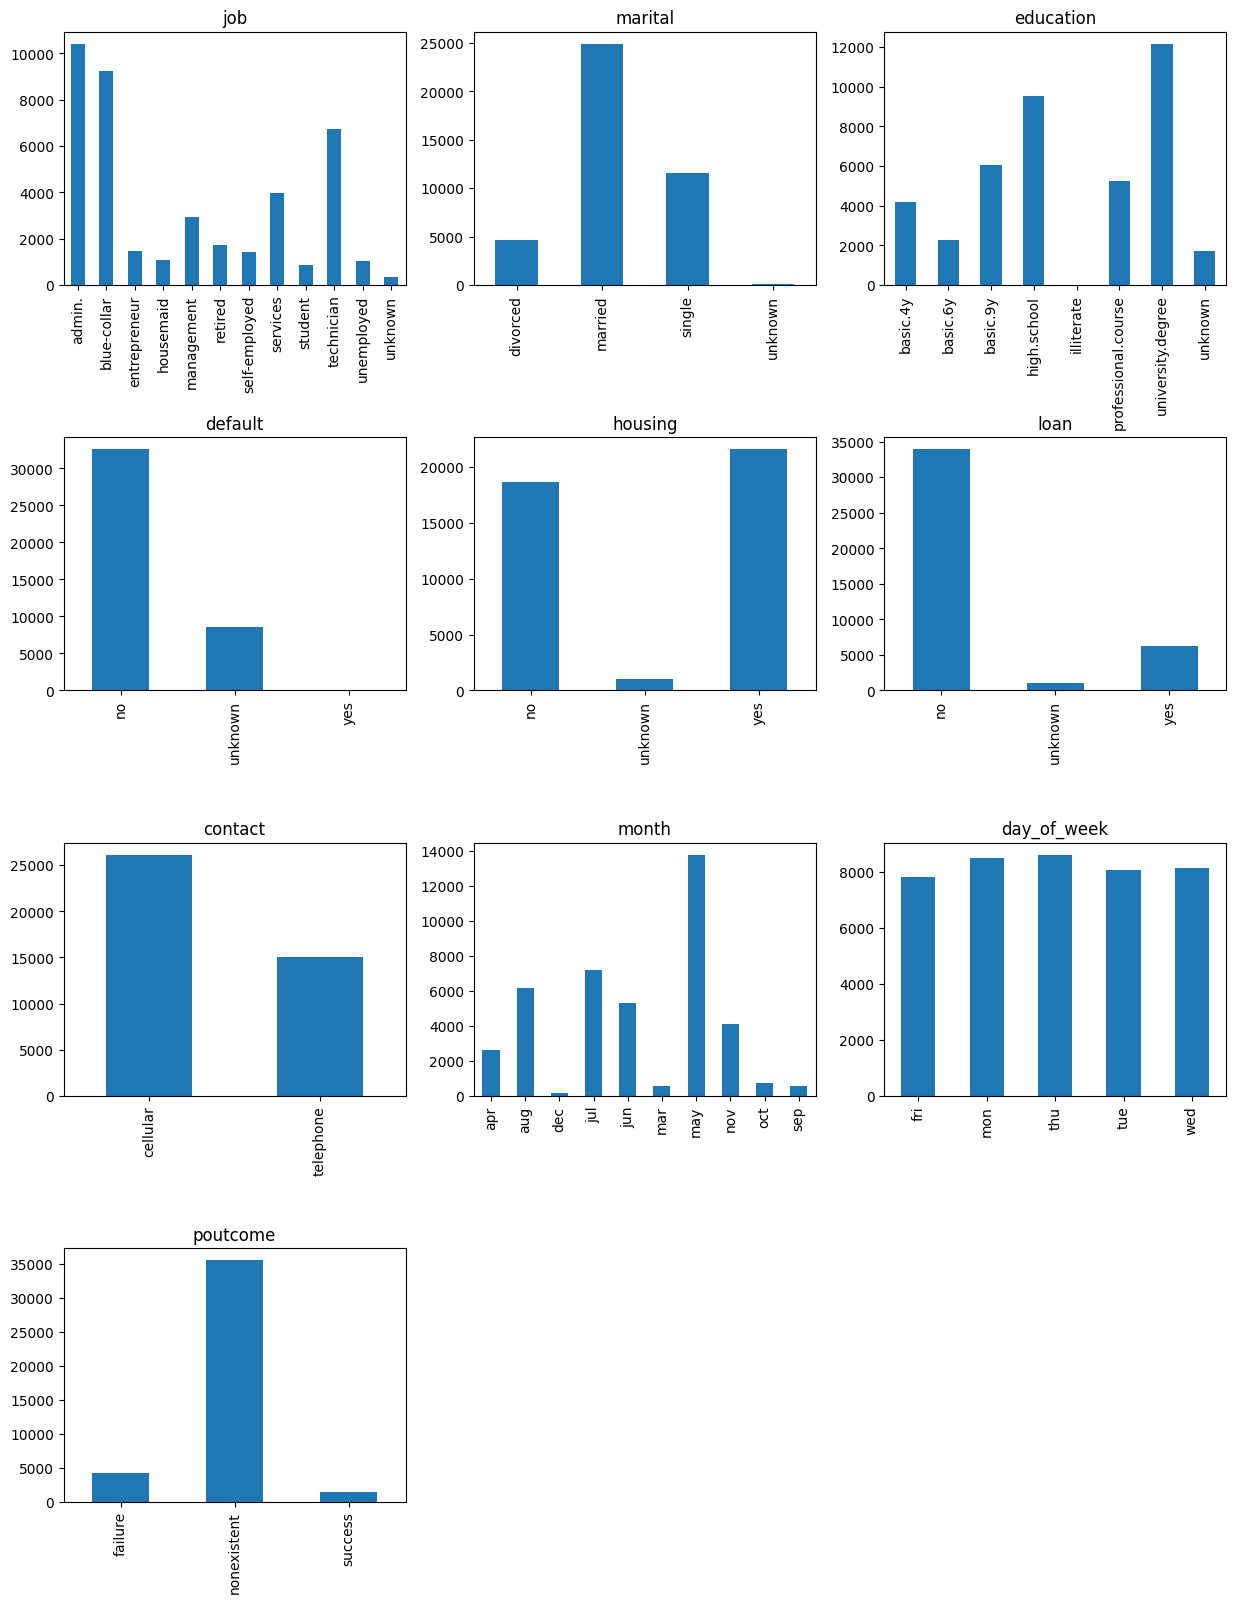

In [26]:
plt.figure(figsize=(15,15))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.6, wspace=0.2)
for column_name in list_categorical_columns:
    plt.subplot(4,3,x)
    x = x+1
    df[column_name].value_counts().sort_index().plot(kind='bar') # index alphabet order
    plt.title(column_name)
plt.show()

##### Target column & categorical column Distribution

In [27]:
df_poutcome_dependent = pd.crosstab(df[target_column], df[list_categorical_columns[-1]])
df_poutcome_dependent

poutcome,failure,nonexistent,success
y,,,
no,3647,32411,479
yes,605,3140,894


<Axes: xlabel='y'>

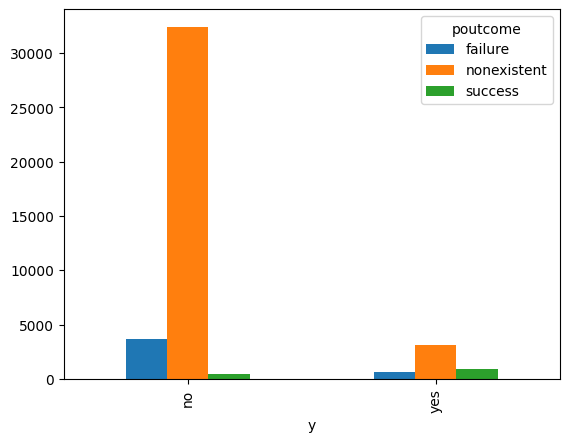

In [28]:
df_poutcome_dependent.plot(kind='bar')

In [29]:
# Normalize, easier to interpret
pd.crosstab(df[target_column], df[list_categorical_columns[-1]], normalize="index")

poutcome,failure,nonexistent,success
y,,,
no,0.099817,0.887073,0.013110
yes,0.130416,0.676870,0.192714


<Axes: xlabel='y'>

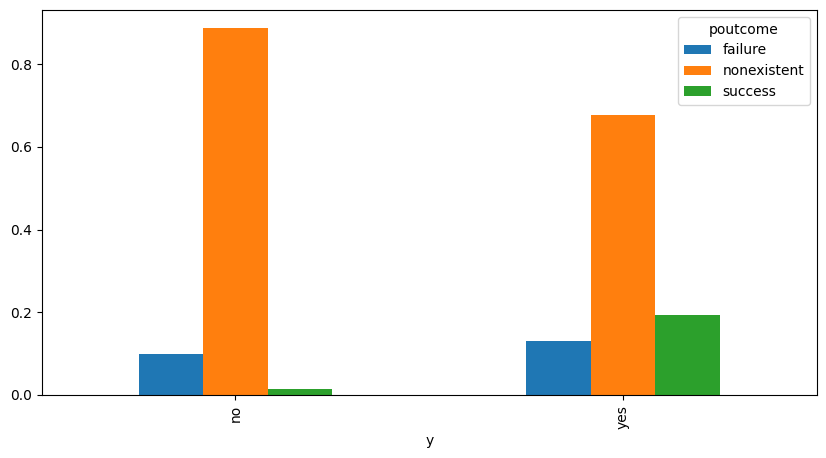

In [30]:
df_poutcome_dependent_ratio = pd.crosstab(df[target_column], df[list_categorical_columns[-1]], normalize="index")
df_poutcome_dependent_ratio.plot.bar(figsize=(10,5))


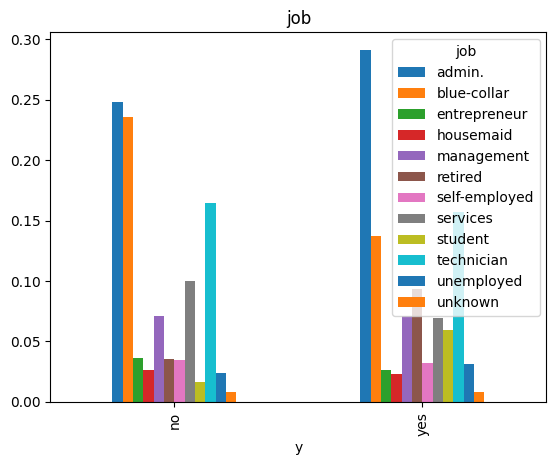

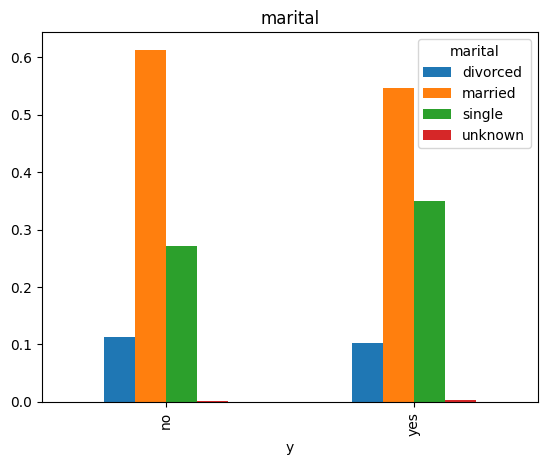

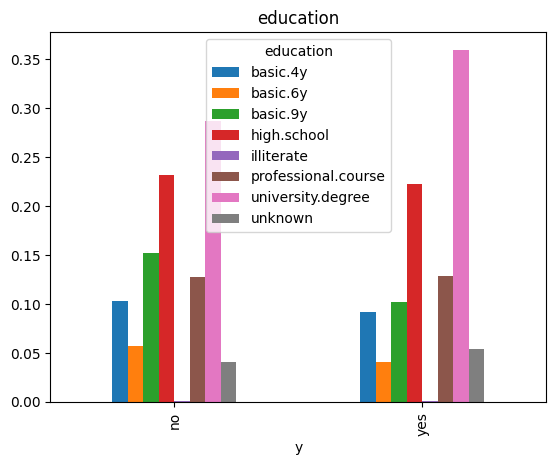

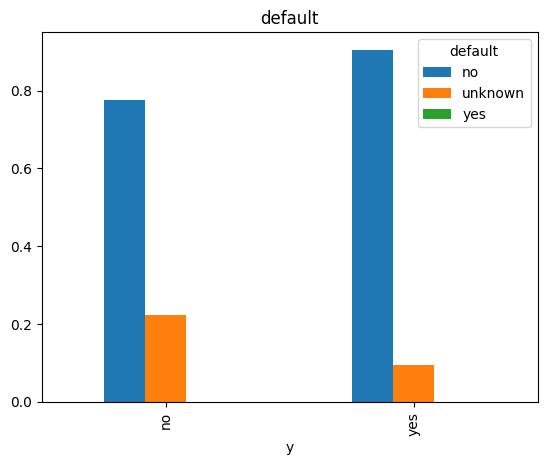

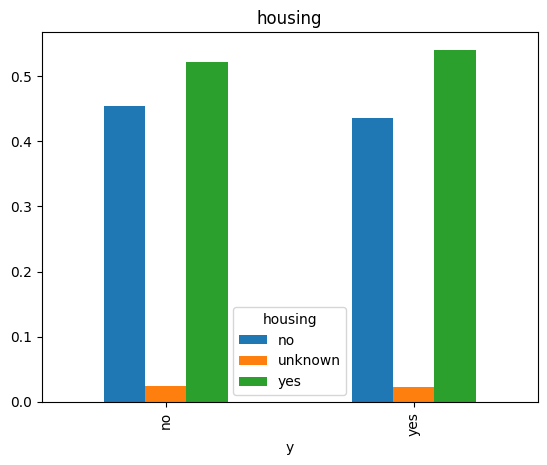

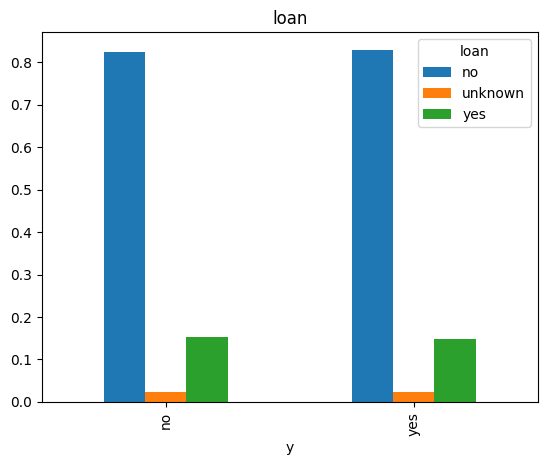

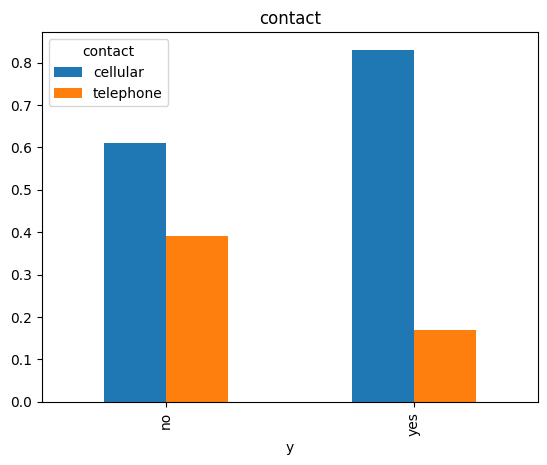

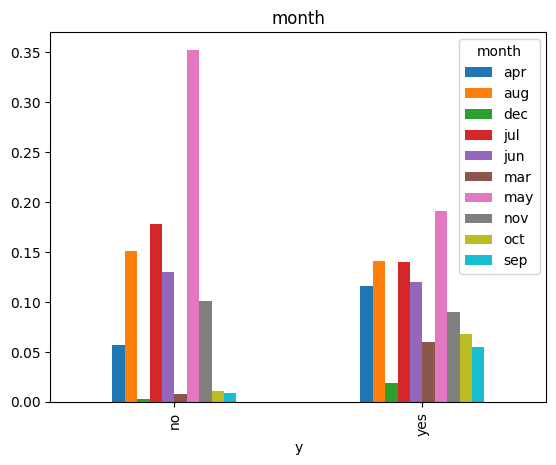

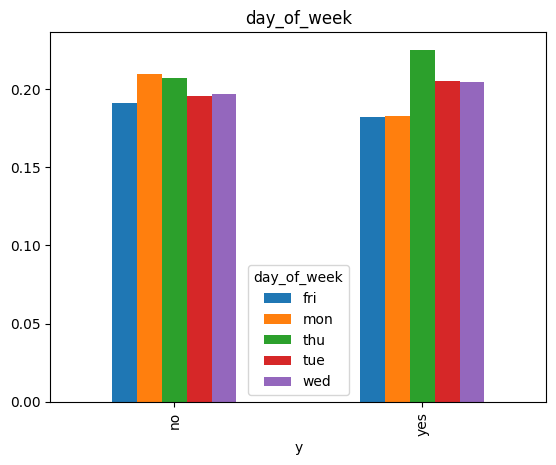

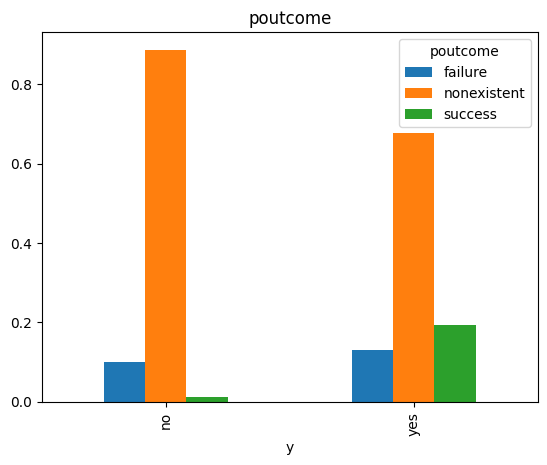

In [31]:
for column_name in list_categorical_columns:
    pd.crosstab(df[target_column], df[column_name], normalize="index").plot.bar()
    plt.title(column_name)
plt.show()

Explanation of Chi-Square Test: 3 Types
1. Goodness of Fit Test
- Number of Variables: 1
- Purpose: To determine if the observed distribution matches an expected distribution.
- Example: A box is known to contain 3 types of balls in equal proportions. After drawing 100 balls, the proportions of each color are calculated. The test checks if the observed proportions follow the known distribution.
- Null Hypothesis: The observed distribution of variable X is the same as the expected distribution.
- Alternative Hypothesis: The observed distribution of variable X is different from the expected distribution.

2. Test of Independence
- Number of Variables: 2
- Purpose: To determine if there is an association between two categorical variables.
- Example: Investigating whether gender is related to smoking status by sampling 200 individuals.
- Null Hypothesis: Variables X and Y are independent.
- Alternative Hypothesis: Variables X and Y are not independent.

3. Test of Homogeneity
- Number of Variables: 2
- Purpose: To determine if different groups have the same distribution.
- Example: After investigating smoking rates among men and women, the test checks if the smoking rates in both groups are the same.
- Null Hypothesis: The probability distributions of the groups are identical.
- Alternative Hypothesis: The probability distributions of the groups are different.

In [35]:
list_meaningful_column_by_chi = []

for column_name in list_categorical_columns:
  statistic, pvalue, _, _ = chi2_contingency(pd.crosstab(df[target_column], df[column_name]))
  if pvalue <= 0.05:
    list_meaningful_column_by_chi.append(column_name)
  print(column_name, statistic, pvalue)

print("all categorical columns : ", len(list_categorical_columns))
print("selected columns by chi : ", len(list_meaningful_column_by_chi), list_meaningful_column_by_chi)

job 961.7438037353177 3.2684116066165443e-199
marital 122.95931379226256 1.778422500461116e-26
education 192.8485047401879 3.746768377534744e-38
default 406.5560941574606 5.2175408937279634e-89
housing 5.742152842222754 0.05663792749452545
loan 1.0992950447716308 0.5771532081176227
contact 862.0807365848323 1.7187406241263769e-189
month 3103.032672105299 0.0
day_of_week 26.054243692750852 3.085754965631736e-05
poutcome 4230.14342770359 0.0
all categorical columns :  10
selected columns by chi :  8 ['job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week', 'poutcome']


#### Insight
- Eight out of ten categorical variables have a significant relationship with the dependent variable y.
- The variables housing and loan do not interact with y.
- The categorical variables that have significant relationships will be selected as features for future machine learning training.

#### 2) Numeric Data Analysis

In [36]:
df[list_numeric_columns].nunique().sort_values()

previous             8
emp.var.rate        10
nr.employed         11
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

In [38]:
df[list_numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
duration,41176.0,258.315815,259.305321,0.000,102.000,180.000,319.000,4918.000
campaign,41176.0,2.567879,2.770318,1.000,1.000,2.000,3.000,56.000
pdays,41176.0,962.464810,186.937102,0.000,999.000,999.000,999.000,999.000
previous,41176.0,0.173013,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41176.0,0.081922,1.570883,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41176.0,93.575720,0.578839,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41176.0,-40.502863,4.627860,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41176.0,3.621293,1.734437,0.634,1.344,4.857,4.961,5.045
nr.employed,41176.0,5167.034870,72.251364,4963.600,5099.100,5191.000,5228.100,5228.100


##### Column Distribution

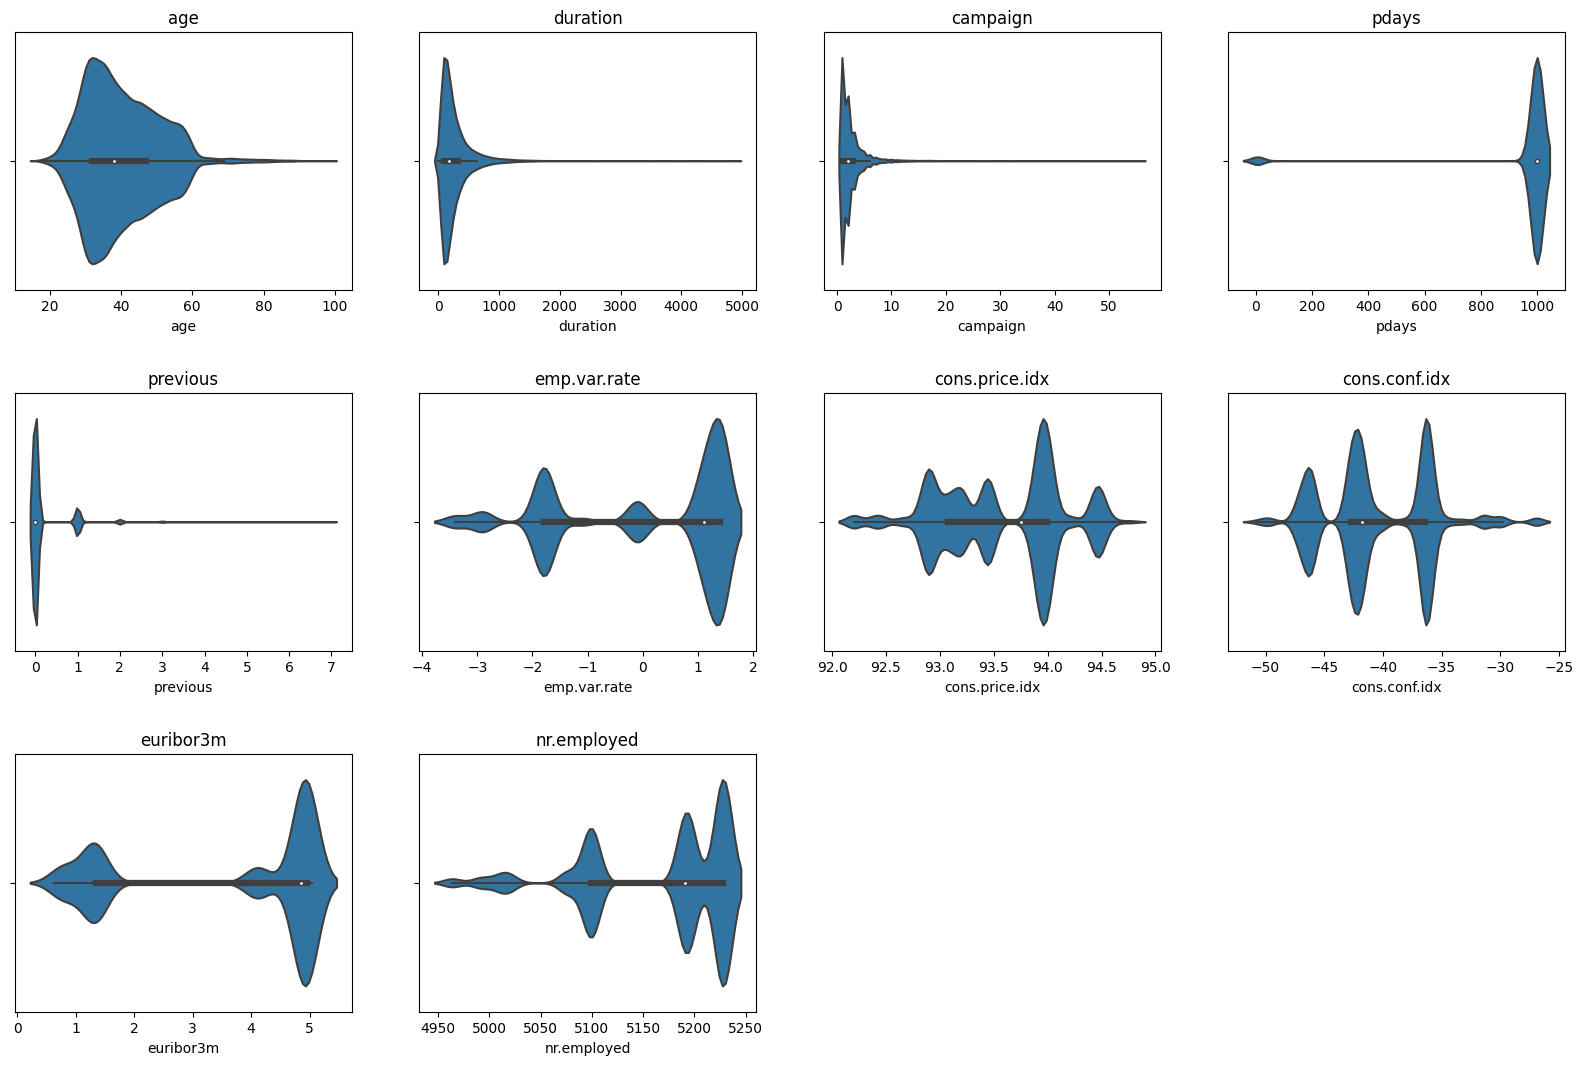

In [40]:
# numeric column 별 분포 확인
plt.figure(figsize=(20,10))
x = 1 

plt.subplots_adjust(top=0.99, bottom = 0.01, hspace = 0.4, wspace=0.2)
for column_name in list_numeric_columns:
  plt.subplot(3,4,x)
  x = x + 1
  sns.violinplot(x=column_name, data=df)
  plt.title(column_name)
plt.show()


In [41]:
for column_name in list_numeric_columns:
  print(column_name, "skew : ", skew(df[column_name]), "kur : ", kurtosis(df[column_name]) )
# maybe need some transformation

age skew :  0.7845316793906337 kur :  0.7908715485573286
duration skew :  3.2626886475171046 kur :  20.241167105999835
campaign skew :  4.76187058291751 kur :  36.96722235388976
pdays skew :  -4.921207099141221 kur :  22.21870880664178
previous skew :  3.8312559388497256 kur :  20.09957712427588
emp.var.rate skew :  -0.7240342146771608 kur :  -1.062714697365619
cons.price.idx skew :  -0.2308444969439891 kur :  -0.8298960161833482
cons.conf.idx skew :  0.3028649665515025 kur :  -0.3591991612497849
euribor3m skew :  -0.7091683770703301 kur :  -1.4067662115952242
nr.employed skew :  -1.0442790133772375 kur :  -0.0036849526898108387


##### Correlation Analysis

<Axes: >

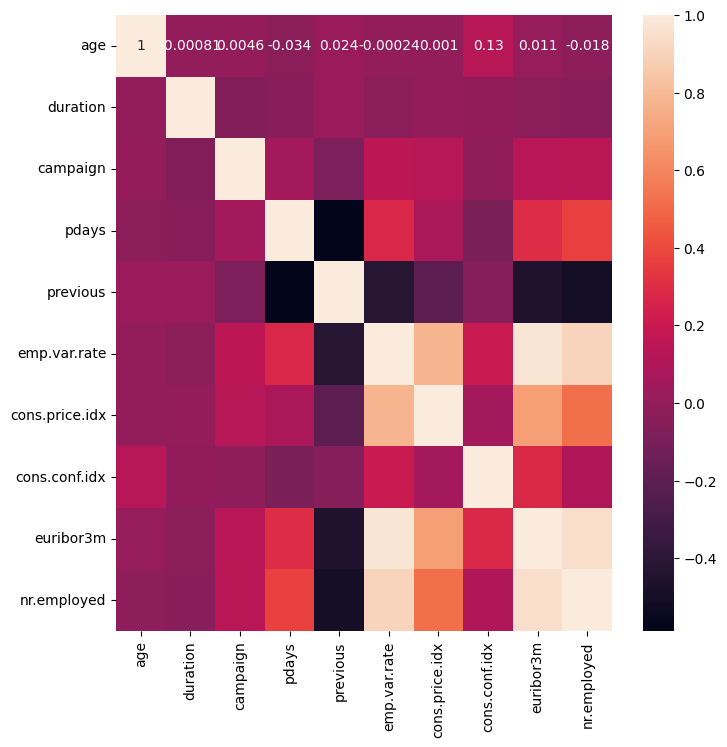

In [42]:
df_corr = df[list_numeric_columns].corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, annot=True)

- The correlation between `euribor3m` and `emp.var.rate` is high at 0.97.
- The correlation between `nr.employed` and `emp.var.rate` is high at 0.91.
- The correlation between `emp.var.rate` and `cons.price.idx` is high at 0.78.
- There are also other variables with high correlations.

- Data with excessively high correlations will be removed, but it is necessary to verify whether these correlation values are reliable.
- The threshold for removal is set at an absolute correlation value of 0.75 or higher.

In [44]:
df_corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


In [43]:
index_corr_over_75 = np.where((abs(df_corr)>0.75) & (df_corr != 1))
index_corr_over_75

(array([5, 5, 5, 6, 8, 8, 9, 9]), array([6, 8, 9, 5, 5, 9, 5, 8]))

In [45]:
len_corr_over_75 = len(index_corr_over_75[0])
left_columns = df_corr.columns[index_corr_over_75[0]]
right_columns = df_corr.columns[index_corr_over_75[1]]
for index in range(len_corr_over_75):
  print(left_columns[index], "<->", right_columns[index])  

emp.var.rate <-> cons.price.idx
emp.var.rate <-> euribor3m
emp.var.rate <-> nr.employed
cons.price.idx <-> emp.var.rate
euribor3m <-> emp.var.rate
euribor3m <-> nr.employed
nr.employed <-> emp.var.rate
nr.employed <-> euribor3m


In [46]:
list_not_valid = []
for index in range(len_corr_over_75):
    statistic, pvalue = stats.pearsonr(df.loc[:,left_columns[index]], df.loc[:,right_columns[index]])
    print("%s<->%s : %f %f"%(left_columns[index],right_columns[index] , statistic, pvalue))
    if (pvalue > 0.05):
        list_not_valid.append(column_name)
print("end")
print(len(list_not_valid), " is not valids")

emp.var.rate<->cons.price.idx : 0.775293 0.000000
emp.var.rate<->euribor3m : 0.972244 0.000000
emp.var.rate<->nr.employed : 0.906949 0.000000
cons.price.idx<->emp.var.rate : 0.775293 0.000000
euribor3m<->emp.var.rate : 0.972244 0.000000
euribor3m<->nr.employed : 0.945146 0.000000
nr.employed<->emp.var.rate : 0.906949 0.000000
nr.employed<->euribor3m : 0.945146 0.000000
end
0  is not valids


In [47]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Example DataFrame 'df' with the independent variables
X = df[list_numeric_columns]  # replace with your actual features

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


          Variable            VIF
0            const  528569.200932
1              age       1.018794
2         duration       1.009459
3         campaign       1.038442
4            pdays       1.614864
5         previous       1.796720
6     emp.var.rate      33.066002
7   cons.price.idx       6.337163
8    cons.conf.idx       2.649399
9        euribor3m      64.342128
10     nr.employed      31.670063


In [48]:
list_removed_by_correlation = ["emp.var.rate", "euribor3m"]

##### Target Column & numeric Column Distribution

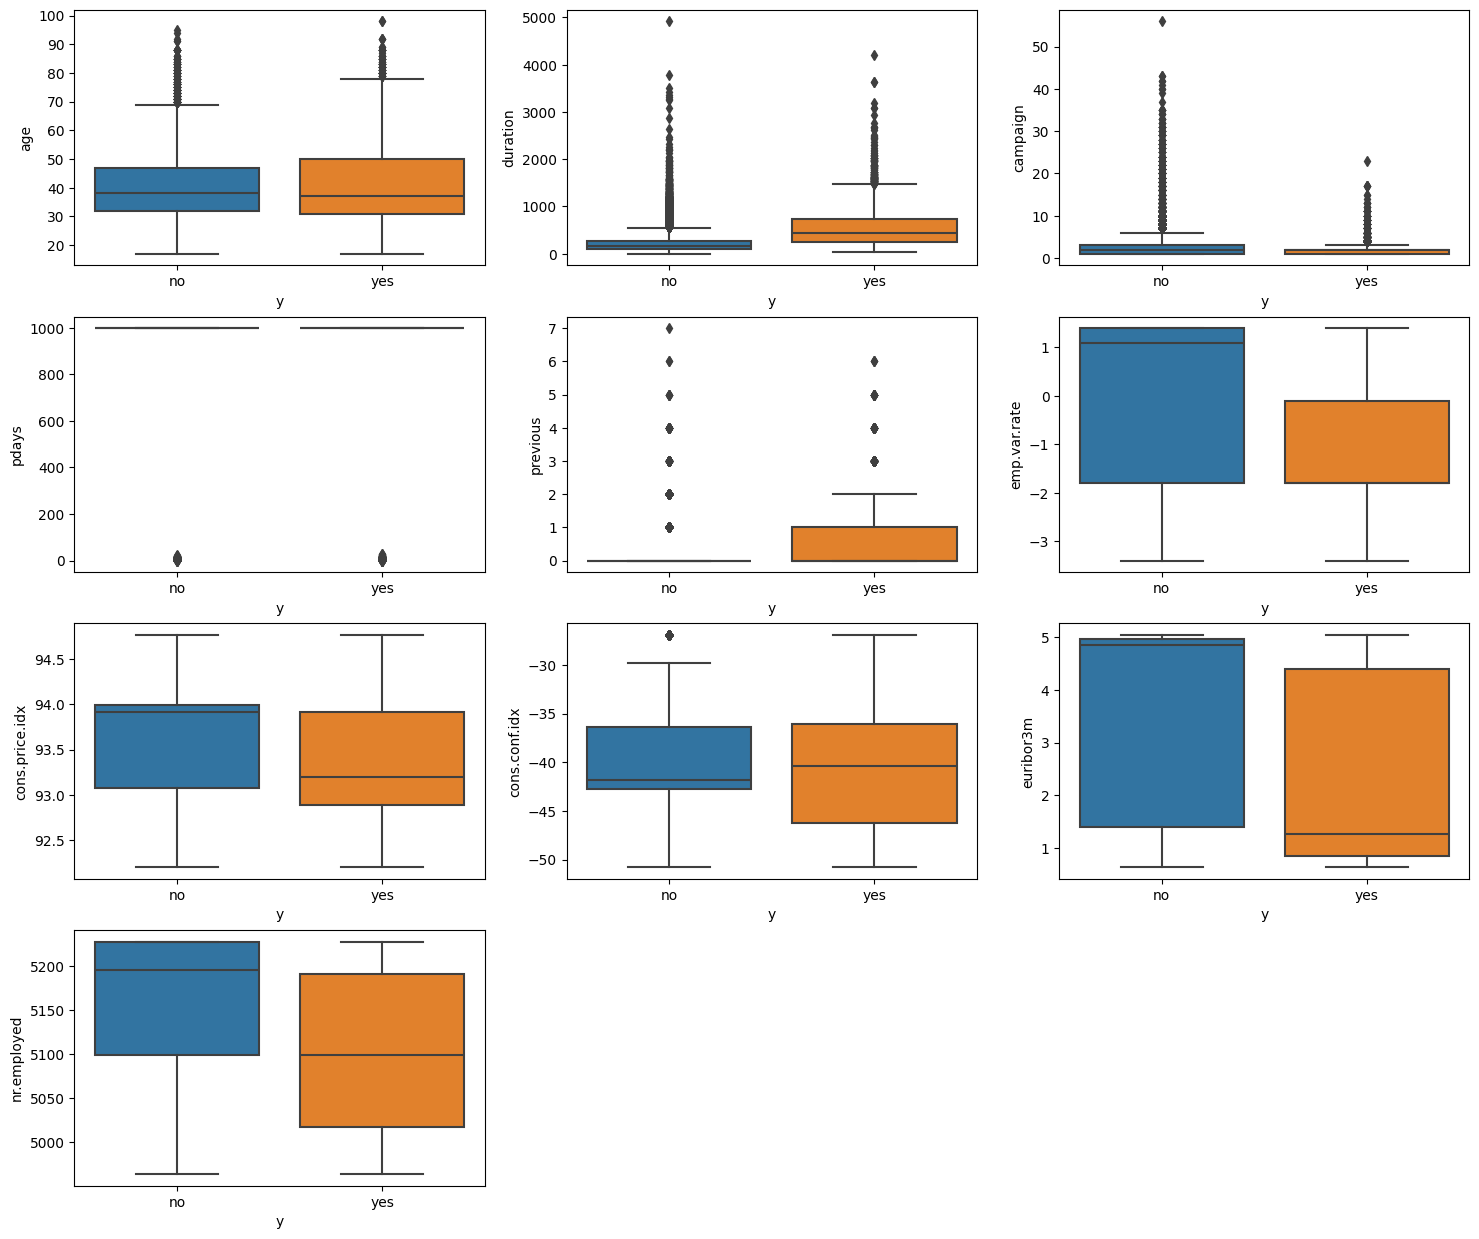

In [49]:
plt.figure(figsize=(18,12))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.2, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(4,3,x)
    x = x + 1
    sns.boxplot(data=df,x=target_column,y=column_name)
plt.show()

#### One-Way Analysis of Variance (ANOVA)
- Used to test differences in the distribution of numeric data across categories.
For example, testing the height distribution across different genders.
- Assumptions: Normality, homogeneity of variances, and independence (the test cannot be trusted if these are not satisfied).
- We will test the relationship between categorical data and arr_delay distribution.
- If the p-value is less than or equal to 0.05, we reject the null hypothesis (though the p-value threshold can vary, 0.05 is commonly used).

#### Normality Test
- For variance analysis, the data must satisfy normality.
- Various methods can be used to test normality: QQ plot, Shapiro-Wilk test.

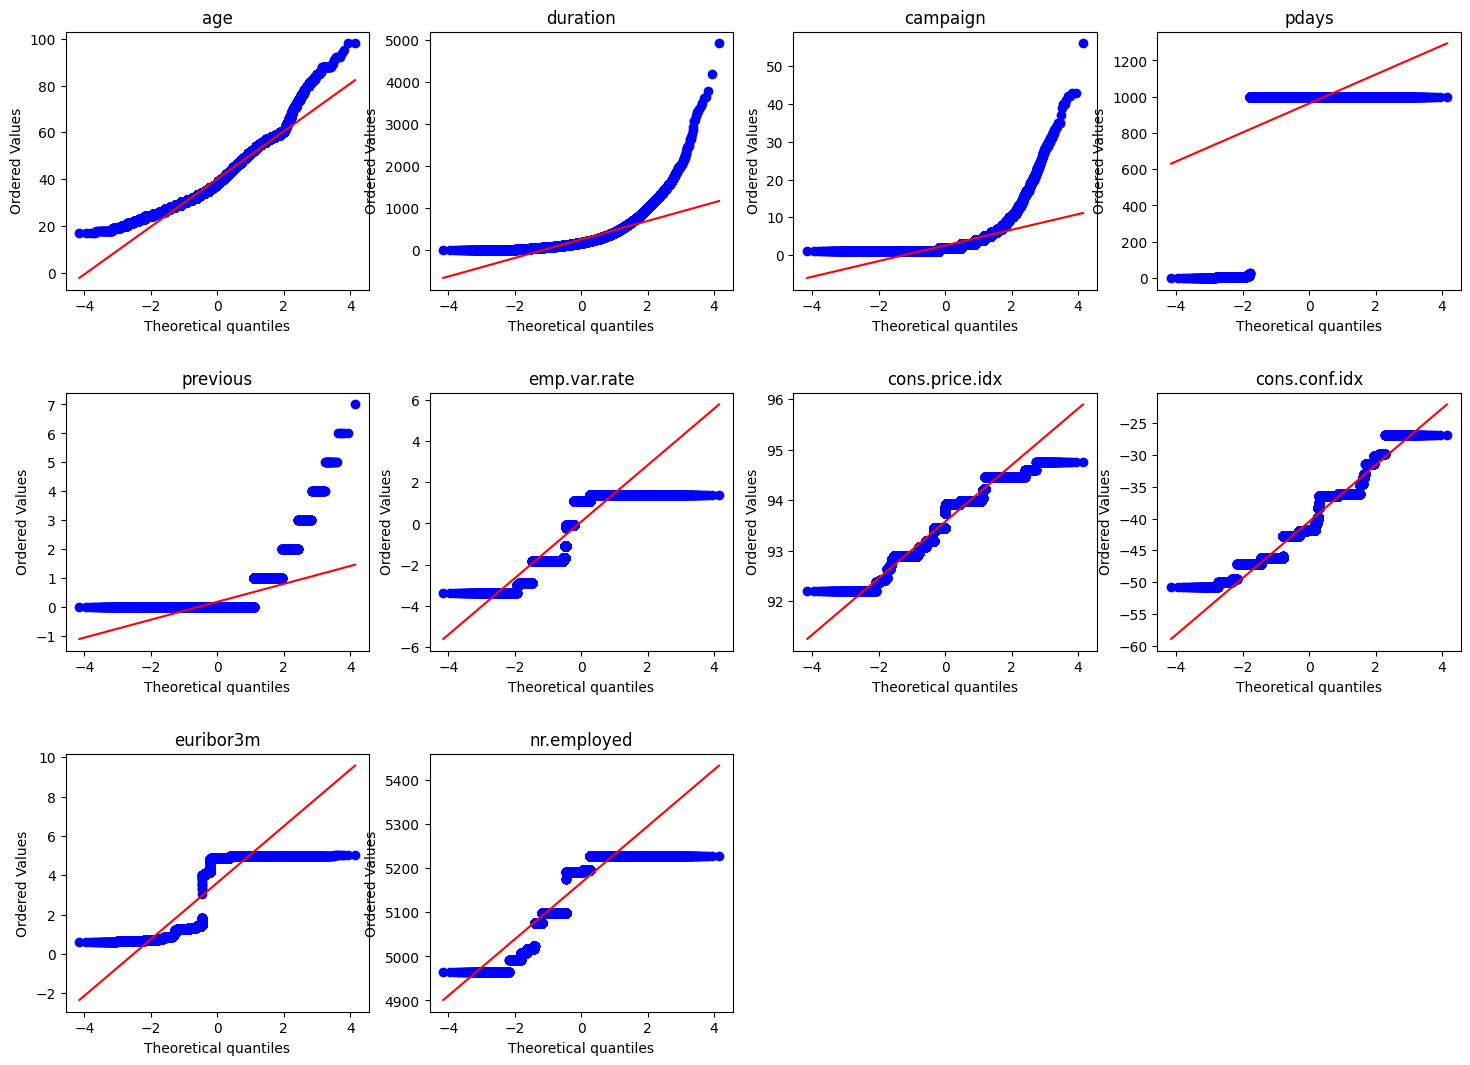

In [50]:
plt.figure(figsize=(18,10))
x = 1
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.2)
for column_name in list_numeric_columns:
    plt.subplot(3,4,x)
    x = x+1

    stats.probplot(df[column_name], dist=stats.norm, plot=plt)

    plt.title(column_name)
plt.show()

In [51]:
list_column_normality = []
for column_name in list_numeric_columns:
  statistic, pvalue = stats.shapiro(df[column_name])
  if pvalue > 0.05:
    list_column_normality.append(column_name)
  print(column_name, ", statistic : ",statistic,", pvalue : ", pvalue)
print("Number of Normality : ", len(list_column_normality))

age , statistic :  0.9572796821594238 , pvalue :  0.0
duration , statistic :  0.7216830849647522 , pvalue :  0.0
campaign , statistic :  0.5578689575195312 , pvalue :  0.0
pdays , statistic :  0.1829797625541687 , pvalue :  0.0
previous , statistic :  0.39130860567092896 , pvalue :  0.0
emp.var.rate , statistic :  0.7621634006500244 , pvalue :  0.0
cons.price.idx , statistic :  0.933931827545166 , pvalue :  0.0
cons.conf.idx , statistic :  0.9238575100898743 , pvalue :  0.0
euribor3m , statistic :  0.6863111853599548 , pvalue :  0.0
nr.employed , statistic :  0.7877941727638245 , pvalue :  0.0
Number of Normality :  0


/Users/chulwonchae/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")



- Normality is not satisfied.
   * Since normality is not satisfied, there is no need for a homoscedasticity test (homoscedasticity assumes normality).
   * Numeric data cannot be tested using one-way ANOVA.

##### Kruskal-Wallis Test (Non-parametric Test)
   * Being a non-parametric test, it does not require normality or homoscedasticity.
   * However, since it is a non-parametric test, the reliability of the test results is lower compared to parametric tests.

In [52]:
list_meaningful_column_by_kruskall = []

list_target_unique = df[target_column].unique()

for column_name in list_numeric_columns:
  list_by_target_value = []
  for target_value in list_target_unique:
    df_tmp = df[df[target_column]==target_value][column_name].dropna()
    list_by_target_value.append(np.array(df_tmp))
  statistic, pvalue = kruskal(*list_by_target_value)
  if pvalue <= 0.05:
    list_meaningful_column_by_kruskall.append(column_name)
  print(column_name, ", ", statistic, ", ", pvalue)
print("all numerical columns : ", len(list_numeric_columns))
print("selected columns by kruskall : ", len(list_meaningful_column_by_kruskall), list_meaningful_column_by_kruskall)

age ,  5.843156420996497 ,  0.015637749222475184
duration ,  5008.952641567334 ,  0.0
campaign ,  166.83794105975488 ,  3.629350163987945e-38
pdays ,  4348.437887965406 ,  0.0
previous ,  1662.3956401363578 ,  0.0
emp.var.rate ,  2520.7461098911913 ,  0.0
cons.price.idx ,  614.0899232769726 ,  1.4427370342045907e-135
cons.conf.idx ,  69.64459433834713 ,  7.101309014386372e-17
euribor3m ,  2930.314757187436 ,  0.0
nr.employed ,  3318.9556210068745 ,  0.0
all numerical columns :  10
selected columns by kruskall :  10 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


#### Insight
- The dependent variable y and all numerical data have significant relationships (Kruskal-Wallis test).
- There are variables with very high correlations, and two of them ("emp.var.rate" and "euribor3m") are planned to be removed.


## 3. Data Processing 2 

### 3-1 Missing Values

In [53]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [54]:
list_selected_numerical = list_meaningful_column_by_kruskall.copy()
for column_name in list_removed_by_correlation:
  list_selected_numerical.remove(column_name)

In [57]:
list_selected_numerical

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed']

In [58]:
list_meaningful_column_by_chi

['job',
 'marital',
 'education',
 'default',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [59]:
df_fs = df[list_meaningful_column_by_chi + list_selected_numerical + [target_column]]
df_fs.head(2)

,job,marital,education,default,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y
0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent,56,261,1,999,0,93.994,-36.4,5191.0,no
1,services,married,high.school,unknown,telephone,may,mon,nonexistent,57,149,1,999,0,93.994,-36.4,5191.0,no


### 3-3 Feature Transformation

In [60]:
Y = df_fs[target_column]
X = df_fs.drop([target_column], axis=1)

In [61]:
Y

0         no
1         no
2         no
3         no
4         no
        ... 
41171    yes
41172     no
41173     no
41174    yes
41175     no
Name: y, Length: 41176, dtype: object

In [62]:
le = LabelEncoder()
le.fit(Y)
Y_encoded = le.transform(Y)

In [63]:
Y_encoded

array([0, 0, 0, ..., 0, 1, 0])

In [64]:
le.inverse_transform(Y_encoded)

array(['no', 'no', 'no', ..., 'no', 'yes', 'no'], dtype=object)

##### Feature Scaling
*   Standardization & MinMaxScaling are different.
*   MinMaxScaling [0,1] scaling (sklearn MinMaxScaler())
*   Standardization Normal Distribution scaling  (sklearn StandardScaler())



In [65]:
list_categorical_columns = list(df_fs.select_dtypes(include=['object']).columns)
list_numeric_columns = list(df_fs.select_dtypes(include=['float64','int64']).columns)
print(len(list_categorical_columns))
print(len(list_numeric_columns))

9
8


In [66]:
df_fs.head(1)

,job,marital,education,default,contact,month,day_of_week,poutcome,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y
0,housemaid,married,basic.4y,no,telephone,may,mon,nonexistent,56,261,1,999,0,93.994,-36.4,5191.0,no
